In [1]:
from pathlib import Path

In [2]:
import torch
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [3]:
bg_path = Path("../data/background")
print(bg_path.exists())
pics_path = []
for  pic  in bg_path.iterdir():
    pics_path.append(pic)
# pics_path

True


In [4]:
# for path in pics_path:
#     img = cv2.imread(str(path), cv2.IMREAD_COLOR)
#     cv2.imshow(path.name, img )
#     cv2.waitKey(0)

## 载入背景图像

In [5]:
# cv2载入数据不如PIL好
imgs = [cv2.imread(str(path), cv2.IMREAD_COLOR) for path in pics_path]

## 获取原始数据

In [6]:
import torchvision

In [7]:
str(bg_path.parent)

'..\\data'

In [8]:
transform  = None
mnist_train_dataset = torchvision.datasets.MNIST(str(bg_path.parent), download=True, train=True,transform=transform)
mnist_test_dataset = torchvision.datasets.MNIST(str(bg_path.parent), download=True, train=False,transform=transform)

In [9]:
 img = mnist_train_dataset[0][0]

In [10]:
img.show()


In [11]:
?img

In [12]:
img

## 使用transformer更变dataset原数据

In [13]:
mnist_train_dataset[0] =' '

TypeError: 'MNIST' object does not support item assignment

In [14]:
## 必须使用transfrom 

In [258]:
from torchvision import transforms 
from numpy import random
from torchvision import transforms
from numpy import random
from PIL import Image
import numpy as np
class AddBg(object):
    
    def __init__(self, config, weight, height):
#         "../data/background"
        bg_path = config.background_path
#         print(bg_path.exists())
        pics_path = []
        for  pic  in bg_path.iterdir():
            pics_path.append(pic)
        # pics_path
        ## 载入PIL image 并转化为RBG（R,G,B,3）图像
        imgs = [Image.open(str(path)).convert('RGB') for path in pics_path]
        self.imgs = [img for img in imgs if img.size[0] > weight and img.size[1] > height]
        self.size = len(imgs)
        print(self.size)
        self.weight = weight
        self.height = height
    
    def __call__(self, pic):
        """
        argumenmt: 
        @pic: Image instance(w,h)
        
        @return: new Image instance(w,h,3)
        
        The size of pic should be (H, W)
  n      The background picture was place in the class config.background_path.
        Well, Let's begin!
        Ps. You should add a pipeline to solve the question that convert Image to tensor.
        """
        pic.convert('RGB')
        
        bg_idx = np.random.randint(0, self.size)
#         self.imgs[bg_idx].show()
        bg = self.getRectImage(self.imgs[bg_idx], self.weight, self.height)
        return self.merge(self.gray2rgb(pic), bg)
    
        
    def getRectImage(self,img, weight, height):
        # watch out the differenct between PIL.image.shape and np.array.shape
        W, H = img.size # shape: (W, W)
        arr = np.array(img) # shape: (H, W) 

        rand_w = random.randint(0, W - weight - 1)
        rand_h = random.randint(0, H - height - 1)    
        narr = arr[rand_h:rand_h+height, rand_w:rand_w+weight :]
#         print(arr.shape)
#         print(W, " ", H)
#         print(rand_w, ' ', rand_h, ' ', weight + rand_w)
#         print(narr.shape)
#         print(arr)
        return Image.fromarray(narr)

    # img and bg should have the same size
#         from functools import reduce
    def merge(self,img, bg):
        arri = np.array(img)
        arrb = np.array(bg)
        # PIL shepe is just the size of pexel, not number.
        print(arri.shape)
        print(arrb.shape)
        print("@@@@@@@@@")
        
    #     shape = arri.shape
#         print(shape)
    #     sum_pixel = reduce(lambda x, y: x * y, shape, 1)
    #     arri = arri.resize(sum_pixel)
    #     arrb = arrb.resize(sum_pixel)
    #     arri.resize(shape)

        return Image.fromarray(np.where(arri != 0, arri, arrb))
    
    def gray2rgb(self, img):
        """
        argurment:
        @img: PIL image instance:(weight, height, 1)
        @return: PIL imagePIL image instance:(weight, height, 3)
        """
        
        arr = np.array(img)
        # add a new dim
        newshape = list(arr.shape).append(3)
#         arr[:, np.newaxis]
        arr2 = np.copy(arr)
        arr3 = np.copy(arr)
        newarr = np.dstack((arr,arr2,arr3))
        print(newarr.shape)
        return Image.fromarray(newarr)

In [259]:

from config import Config

In [260]:
config  = Config()
config.background_path = Path("../data/background")


_____________________________________
<class 'type'> confinging 
New using computation device cuda


In [261]:
c = AddBg(config, 28, 28)

29


In [262]:
img.size

(28, 28)

In [263]:
img  = mnist_train_dataset[0][0]

In [264]:
random.randint(0,5)

4

In [265]:
cc = c(img)

(28, 28, 3)
(28, 28, 3)
(28, 28, 3)
@@@@@@@@@


In [266]:
cc

###  Image转化为三通道

In [ ]:
RGB_img = img.convert('RGB')

In [ ]:
np.array(RGB_img).shape

In [ ]:
# np.array(RGB_img)[:,:,1]

### 截取28 * 28 图像

In [84]:
pic1_path = pics_path[0]

In [93]:
bg1 = Image.open(str(pic1_path))

In [94]:
bg1.show()

In [92]:
# w,h
bg1.size

(475, 526)

In [91]:
?bg1

In [ ]:
bg1.get

In [110]:
from numpy import random
 
# get a rect from a image, which shape is (weight, height , 3)

def getRectImage(img, weight, height):
    
    W, H = img.size
    arr = np.array(img)
    
    rand_w = random.randint(0, W - weight)
    rand_h = random.randint(0, H - height)    
    arr = arr[rand_w:rand_w+weight, rand_h:rand_h+height, :]
    return Image.fromarray(arr)




In [111]:
bg28 = getRectImage(bg1, 28, 28)

In [112]:
bg28

In [113]:
bg28.size

(28, 28)

In [140]:
testnp = np.array(img)

In [141]:
testnp.resize(28 *28)

In [143]:
img.size

(28, 28)

In [147]:
np.where(testnp>0)

(array([152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 176,
        177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189,
        190, 191, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213,
        214, 215, 216, 217, 218, 231, 232, 233, 234, 235, 236, 237, 238,
        239, 240, 241, 260, 261, 262, 263, 264, 265, 266, 268, 269, 289,
        290, 291, 292, 293, 319, 320, 321, 322, 347, 348, 349, 350, 376,
        377, 378, 379, 380, 381, 405, 406, 407, 408, 409, 410, 434, 435,
        436, 437, 438, 439, 463, 464, 465, 466, 467, 493, 494, 495, 496,
        518, 519, 520, 521, 522, 523, 524, 544, 545, 546, 547, 548, 549,
        550, 551, 570, 571, 572, 573, 574, 575, 576, 577, 578, 596, 597,
        598, 599, 600, 601, 602, 603, 604, 605, 622, 623, 624, 625, 626,
        627, 628, 629, 630, 631, 648, 649, 650, 651, 652, 653, 654, 655,
        656, 657, 676, 677, 678, 679, 680, 681, 682, 683], dtype=int64),)

### 图像重叠 from numpy\

In [115]:
img

In [153]:
img.size

(28, 28)

In [135]:
testnp

array([ 22,  21,  21, 255,  18,  17,  17, 255,  30,  35,  27, 255,  37,
        51,  38, 255,  28,  31,  28, 255,  23,  22,  23, 255,  28,  30,
        28, 255,  27,  35,  30, 255,  31,  39,  32, 255,  35,  48,  42,
       255,  46,  62,  57, 255,  42,  62,  52, 255,  47,  62,  50, 255,
        68,  87,  72, 255,  83,  99,  84, 255,  79,  96,  78, 255,  70,
        92,  75, 255,  71,  96,  75, 255,  61,  84,  69, 255,  49,  71,
        60, 255,  55,  76,  63, 255,  73,  98,  75, 255,  85, 106,  80,
       255,  88, 103,  74, 255,  82,  96,  65, 255,  70,  83,  59, 255,
        66,  76,  56, 255,  71,  82,  58, 255,  23,  27,  24, 255,  34,
        48,  34, 255,  49,  81,  50, 255,  52,  83,  48, 255,  38,  57,
        40, 255,  30,  32,  29, 255,  30,  33,  29, 255,  34,  43,  36,
       255,  42,  54,  45, 255,  35,  52,  45, 255,  45,  70,  62, 255,
        64,  88,  77, 255,  49,  66,  57, 255,  38,  51,  45, 255,  56,
        72,  59, 255,  80,  98,  78, 255,  76,  94,  74, 255,  6

In [154]:
bg28

In [156]:
?bg28

In [155]:
bg28.size

(28, 28)

In [163]:


bg283= bg28.convert("RGB")
img3= img.convert("RGB")

In [171]:
?bg283


In [170]:
?img3

In [182]:
# img and bg should have the same size
from functools import reduce
def merge(img, bg):
    arri = np.array(img)
    arrb = np.array(bg)
#     shape = arri.shape
#     print(shape)
#     sum_pixel = reduce(lambda x, y: x * y, shape, 1)
#     arri = arri.resize(sum_pixel)
#     arrb = arrb.resize(sum_pixel)
#     arri.resize(shape)
    
    return np.where(arri != 0, arri, arrb)    

In [183]:
mergeimg = merge(img3, bg283)

In [184]:
mergeing

NameError: name 'mergeing' is not defined

### numpy 与 Image

In [40]:
n_img = np.array(img)

In [46]:
#使用narray索引赋值
n_img[n_img == 0] = 255


In [118]:
n_img.shape

(28, 28)

In [47]:
n_img

array([[255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,
        255, 255],
       [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255,   1,
          1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1, 255, 255,
        255, 255],
       [25

In [60]:
n_img.shape

(28, 28)

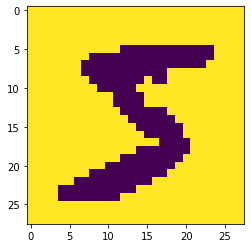

In [59]:
plt.imshow(n_img)

In [87]:
nnimg = Image.fromarray(n_img)

In [88]:

nnimg